#  Self Study 3

In this self study we perform character recognition using SVM classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0..9 at a resolution of 28x28 pixels. 

Stuff we need:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from deskew import determine_skew

Now we get the MNIST data. Using the fetch_mldata function, this will be downloaded from the web, and stored in the directory you specify as data_home (replace my path in the following cell):

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', data_home='/ml/Data')

The data has .data and .target attributes. The following gives us some basic information on the data:

In [4]:
print("Number of datapoints: {}\n".format(mnist.data.shape[0]))
print("Number of features: {}\n".format(mnist.data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist.target)))

Number of datapoints: 70000

Number of features: 784

List of labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']



We can plot individual datapoints as follows:

Value of datapoint no. 4:
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 4, Length: 784, dtype: float64

As image:



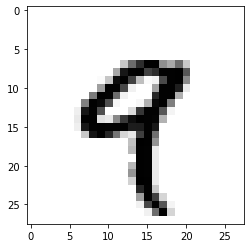

In [5]:
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index,mnist.data.loc[index]))
print("As image:\n")
plt.imshow(mnist.data.loc[index].values.reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

The first datapoint now is: 



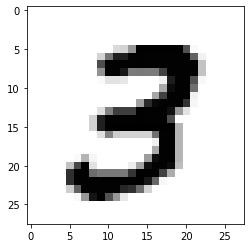

7        3
10       3
12       3
15       7
27       3
        ..
69975    3
69979    7
69986    3
69990    7
69996    3
Name: class, Length: 14434, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [6]:
digit0='3'
digit1='7'
mnist_bin_data=mnist.data.loc[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
print("The first datapoint now is: \n")
plt.imshow(mnist_bin_data.loc[7].values.reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print(mnist_bin_target)

**Exercise 1 [SVM]:** Split the mnist_bin data into training and test set. Learn different SVM models by varying the kernel functions (SVM). For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. 

You can get the current time using:

`import time` <br>
`now = time.time()`

*Caution*: for some configurations, learning here can take a little while (several minutes).

Using the numpy where() function, one can extract the indices of the test cases that were misclassified: <br>
`misclass = np.where(test != predictions)` <br>
Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? 

How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels. What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

In [7]:
def mkbinary(digit0, digit1):
    mnist_bin_data=mnist.data.loc[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
    mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
    return train_test_split(mnist_bin_data, mnist_bin_target, random_state=13)


digit_pairs=[('1','0'), ('4','5')]
kernels=['linear', 'poly', 'rbf', 'sigmoid']

for kern in kernels:
    for digit0, digit1 in digit_pairs:
        X_train, X_test, y_train, y_test = mkbinary(digit0, digit1)
        model = SVC(kernel=kern)
        before = time.time()
        model.fit(X_train, y_train)
        after = time.time()
        print(f"kern: {kern} digits: ({digit0},{digit1}) time: {after-before} acc: {accuracy_score(y_test, model.predict(X_test))}")

print("rbf is best")

kern: linear digits: (1,0) time: 0.40096044540405273 acc: 0.9989174560216508
kern: linear digits: (4,5) time: 1.3044846057891846 acc: 0.9859969558599696
kern: poly digits: (1,0) time: 0.972400426864624 acc: 0.9989174560216508
kern: poly digits: (4,5) time: 2.112351655960083 acc: 0.9972602739726028
kern: rbf digits: (1,0) time: 0.7869248390197754 acc: 0.9997293640054127
kern: rbf digits: (4,5) time: 1.9068984985351562 acc: 0.9975646879756469
kern: sigmoid digits: (1,0) time: 0.8687050342559814 acc: 0.9945872801082544
kern: sigmoid digits: (4,5) time: 2.692802906036377 acc: 0.9439878234398782
rbf is best


mis: [1054 1475 1568 1905 2230 2511]


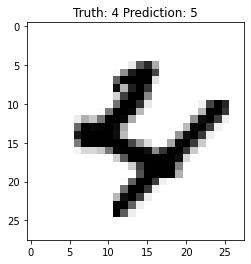

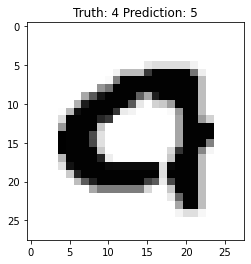

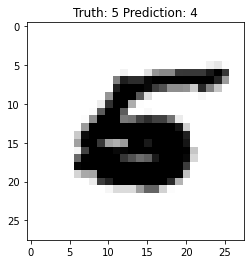

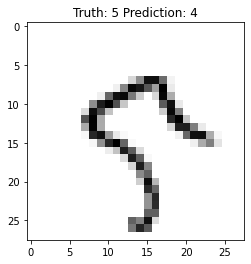

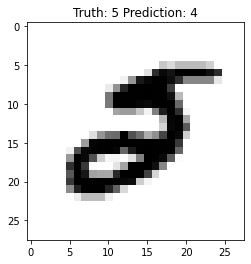

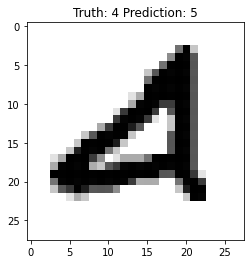

In [8]:
X_train, X_test, y_train, y_test = mkbinary('4', '5')
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
pred = model.predict(X_test)
misclass = np.where(y_test != pred)[0][:6]

print(f"mis: {misclass}")

for index in misclass:
    plt.imshow(X_test.values[index].reshape(28,28),cmap=plt.cm.gray_r)
    plt.title(f"Truth: {y_test.values[index]} Prediction: {pred[index]}")
    plt.show()

9 and 4 get mixed up; 9 and 7 too; 8 and 5 too


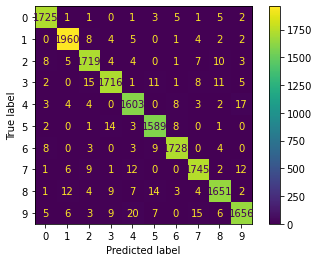

In [9]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, random_state=13)
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test)
print("9 and 4 get mixed up; 9 and 7 too; 8 and 5 too")

**Exercise 2 [SVM]:** Consider how the current data representation "presents" the digits to the classifiers, and try to improve this:<br>

**a)** Manually design feature functions for which you expect that based on your new features SVM classifiers can achieve a better accuracy than with the original features. Transform the data into your new feature space, and learn new classifiers. What accuracies do you get?

**b)** Instead of designing an explicit feature mapping as in **a)**, define a suitable measure of similarity for the digits, and implement that measure as a kernel function. (Optional: verify that the function you have defined actually satisfies the positive-semidefiniteness property.) Use your kernel function as a custom kernel for the SVC classifier.  See http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py for an example.

In [10]:
from skimage.transform import rotate

def unskew(ndarray):
    reshaped = ndarray.reshape(28,28)
    skew = determine_skew(reshaped)
    return rotate(reshaped, skew, resize=False).reshape(784)


unskewed = np.array(list(map(unskew, mnist.data.values)))

In [11]:
from scipy.stats import kurtosis
from scipy.stats import skew

def make_features(ndarray):
    return np.array([np.var(ndarray), np.mean(ndarray), kurtosis(ndarray), skew(ndarray)])

features = np.array(list(map(make_features, unskewed)))
X_train, X_test, y_train, y_test = train_test_split(features, mnist.target.values, random_state=13)
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
print(f"{accuracy_score(y_test,model.predict(X_test))}")

0.2054857142857143


<ipython-input-12-a372543ad393>:2: RuntimeWarning: invalid value encountered in true_divide
  return np.dot(ndarray1, ndarray2.T) / np.sqrt(np.dot(np.square(ndarray1), np.square(ndarray2).T))


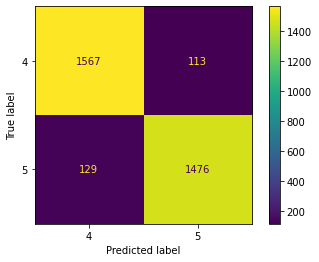

In [12]:
def dist_kern(ndarray1, ndarray2):
    return np.dot(ndarray1, ndarray2.T) / np.sqrt(np.dot(np.square(ndarray1), np.square(ndarray2).T))


#X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, random_state=13)
X_train, X_test, y_train, y_test = mkbinary('4', '5')
model = SVC(kernel=dist_kern)
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test)